In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.layers import Input, Conv2D, Dense, Flatten, Dropout
from tensorflow.keras.models import Model

In [2]:
fashion_mnist = tf.keras.datasets.fashion_mnist

(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0
x_train.shape

4423680/4422102 [==============================] - 0s 0us/step


(60000, 28, 28)

In [3]:
# the data is 2D
# convolution expects height x width x color
x_train = np.expand_dims(x_train, -1)
x_test = np.expand_dims(x_test, -1)
x_train.shape

(60000, 28, 28, 1)

In [4]:
# number of classes
# set contains only unique elements
K = len(set(y_train))
K

10

In [5]:
# Build the model using the functional API
i = Input(shape=x_train[0].shape)
x = Conv2D(32, (3, 3), strides=2, activation="relu")(i)
x = Conv2D(64, (3, 3), strides=2, activation="relu")(x)
x = Conv2D(128, (3, 3), strides=2, activation="relu")(x)
x = Flatten()(x)
x = Dropout(0.2)(x)
x = Dense(512, activation="relu")(x)
x = Dropout(0.2)(x)
x = Dense(K, activation="softmax")(x)

model = Model(i, x)

In [6]:
# Compile and fit
model.compile(optimizer="adam",
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])
r = model.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=15)


Epoch 1/15
1875/1875 [==============================] - 5s 3ms/step - loss: 0.5250 - accuracy: 0.8062 - val_loss: 0.4209 - val_accuracy: 0.8472
Epoch 2/15
1875/1875 [==============================] - 5s 2ms/step - loss: 0.3631 - accuracy: 0.8642 - val_loss: 0.3445 - val_accuracy: 0.8751
Epoch 3/15
1875/1875 [==============================] - 5s 2ms/step - loss: 0.3138 - accuracy: 0.8827 - val_loss: 0.3362 - val_accuracy: 0.8768
Epoch 4/15
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2824 - accuracy: 0.8943 - val_loss: 0.3122 - val_accuracy: 0.8864
Epoch 5/15
1875/1875 [==============================] - 5s 2ms/step - loss: 0.2582 - accuracy: 0.9032 - val_loss: 0.3071 - val_accuracy: 0.8887
Epoch 6/15
1875/1875 [==============================] - 5s 2ms/step - loss: 0.2338 - accuracy: 0.9123 - val_loss: 0.2904 - val_accuracy: 0.8954
Epoch 7/15
1875/1875 [==============================] - 5s 2ms/step - loss: 0.2160 - accuracy: 0.9190 - val_loss: 0.2928 - val_accuracy:

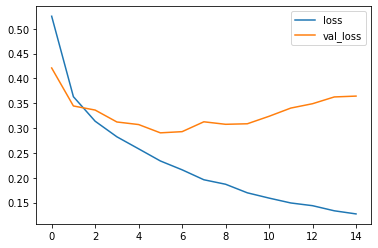

In [7]:
# Loss per iteration
import matplotlib.pyplot as plt
plt.plot(r.history['loss'], label='loss')
plt.plot(r.history['val_loss'], label='val_loss')
plt.legend()

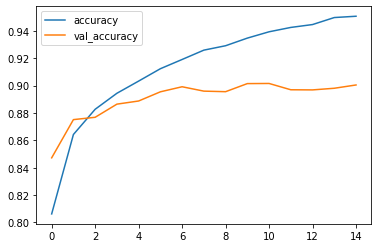

In [8]:
# Accuracy per iteration
plt.plot(r.history['accuracy'], label='accuracy')
plt.plot(r.history['val_accuracy'], label='val_accuracy')
plt.legend()

In [9]:
# Evaluate the model
print(model.evaluate(x_test, y_test))

313/313 [==============================] - 1s 2ms/step - loss: 0.3643 - accuracy: 0.9004
[0.3643238842487335, 0.9003999829292297]


Confusion matrix without normalization
[[874   1  26  27   3   1  66   0   2   0]
 [  1 976   1  18   1   0   2   0   1   0]
 [ 22   1 867   7  46   1  56   0   0   0]
 [ 10   1  18 925  28   1  17   0   0   0]
 [  3   1  60  38 837   0  60   0   1   0]
 [  0   0   0   0   0 982   0  15   0   3]
 [120   1  77  35  96   0 663   0   7   1]
 [  0   0   0   0   0  15   0 976   0   9]
 [  6   0   4   4   4   3   8   4 967   0]
 [  1   0   0   0   0  11   0  50   1 937]]


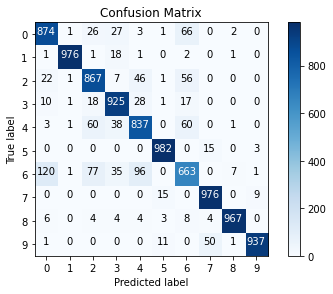

In [10]:
# Plot confusion matrix
from sklearn.metrics import confusion_matrix
import numpy as np
import itertools

def plot_confusion_matrix(cm, classes, normalize=False, title='Confusion Matrix', cmap=plt.cm.Blues):
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print("Confusion matrix without normalization")
    print(cm)
    
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes)
    plt.yticks(tick_marks, classes)
    
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt), horizontalalignment="center", color="white" if cm[i, j] > thresh else "black")
        
    plt.tight_layout()
    plt.ylabel("True label")
    plt.xlabel("Predicted label")
    plt.show()
    
p_test = model.predict(x_test).argmax(axis=1)
cm = confusion_matrix(y_test, p_test)
plot_confusion_matrix(cm, list(range(10)))

In [11]:
# Label mapping
labels = ["T-shirt/top", "Trousers", "Pullover", "Dress", "Coat", "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]

Text(0.5, 1.0, 'True label: Shirt Predicted: T-shirt/top')

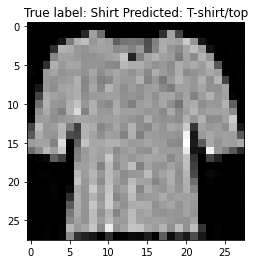

In [17]:
# Show some misclassified examples
misclassified_idx = np.where(p_test != y_test)[0]
i = np.random.choice(misclassified_idx)
plt.imshow(x_test[i].reshape(28, 28), cmap='gray')
plt.title("True label: %s Predicted: %s" % (labels[y_test[i]], labels[p_test[i]]))